Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('student-mat.csv')

Encoding binary for yes/no columns

In [2]:
# encode famsup and schoolsup
# NOTE: make sure to only run it ONCE !
# run this line if u have to reset the data:
#data = pd.read_csv('student-mat.csv')

binary_encoder = {
    'yes':1,
    'no':0,
    }

# famsup
fam_sup_binary = data['famsup'].map(binary_encoder)
data['famsup'] = fam_sup_binary

# schoolsup
school_sup_binary = data['schoolsup'].map(binary_encoder)
data['schoolsup'] = school_sup_binary

# paid
paid_binary = data['paid'].map(binary_encoder)
data['paid'] = paid_binary

# activities
activities_binary = data['activities'].map(binary_encoder)
data['paid'] = activities_binary

# nusery
nusery_binary = data['nursery'].map(binary_encoder)
data['nursery'] = nusery_binary

# higher
higher_binary = data['higher'].map(binary_encoder)
data['higher'] = higher_binary

# internet
internet_binary = data['internet'].map(binary_encoder)
data['internet'] = internet_binary

# romantic 
romantic_binary = data['romantic'].map(binary_encoder)
data['romantic'] = romantic_binary

In [3]:
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
numeric_cols = [col for col in data.columns if data[col].dtype != 'object']

In [4]:
categorical_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'activities']

In [5]:
numeric_cols

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [6]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


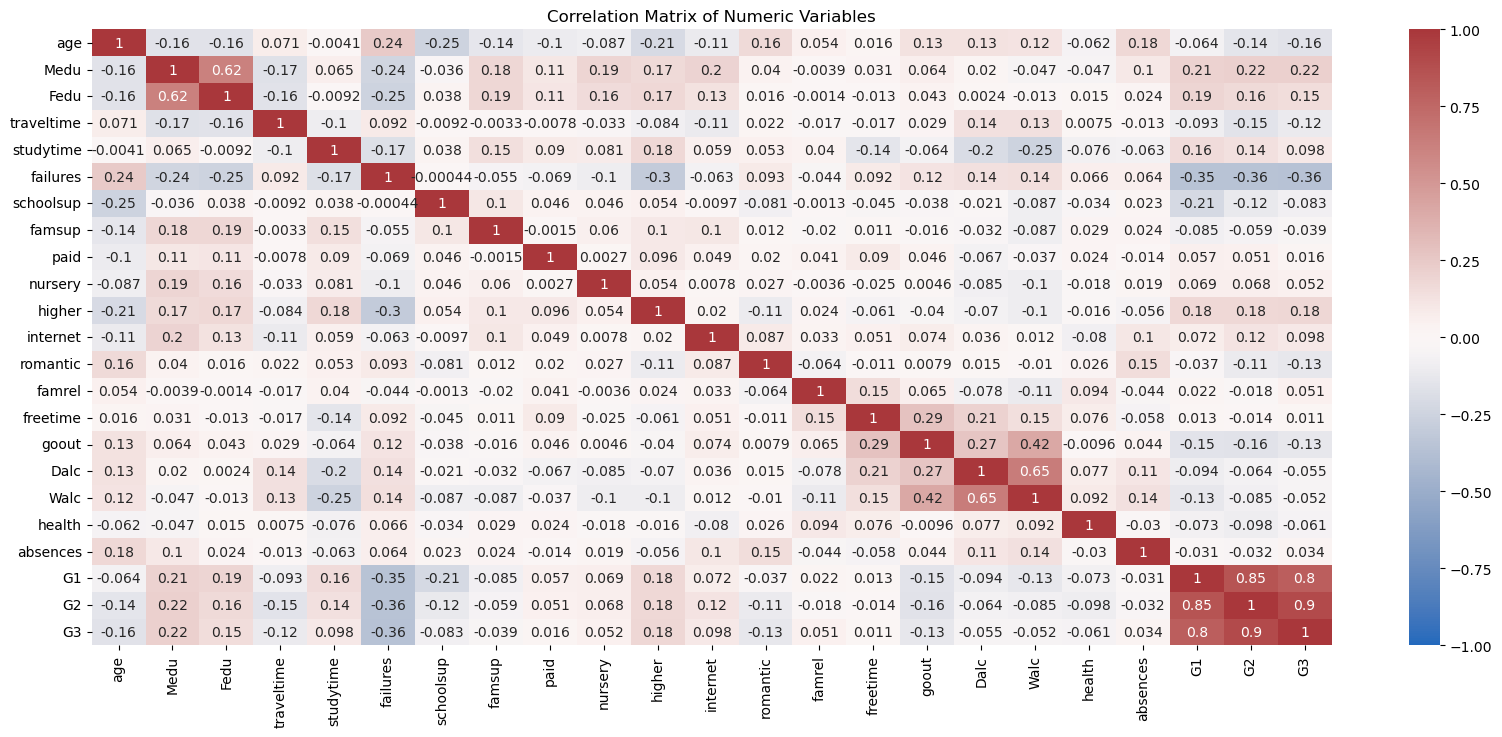

In [6]:
# Correlation matrix heatmap
plt.figure(figsize=(20, 8))
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, vmin=-1,vmax=1,cmap="vlag",center=0,annot=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

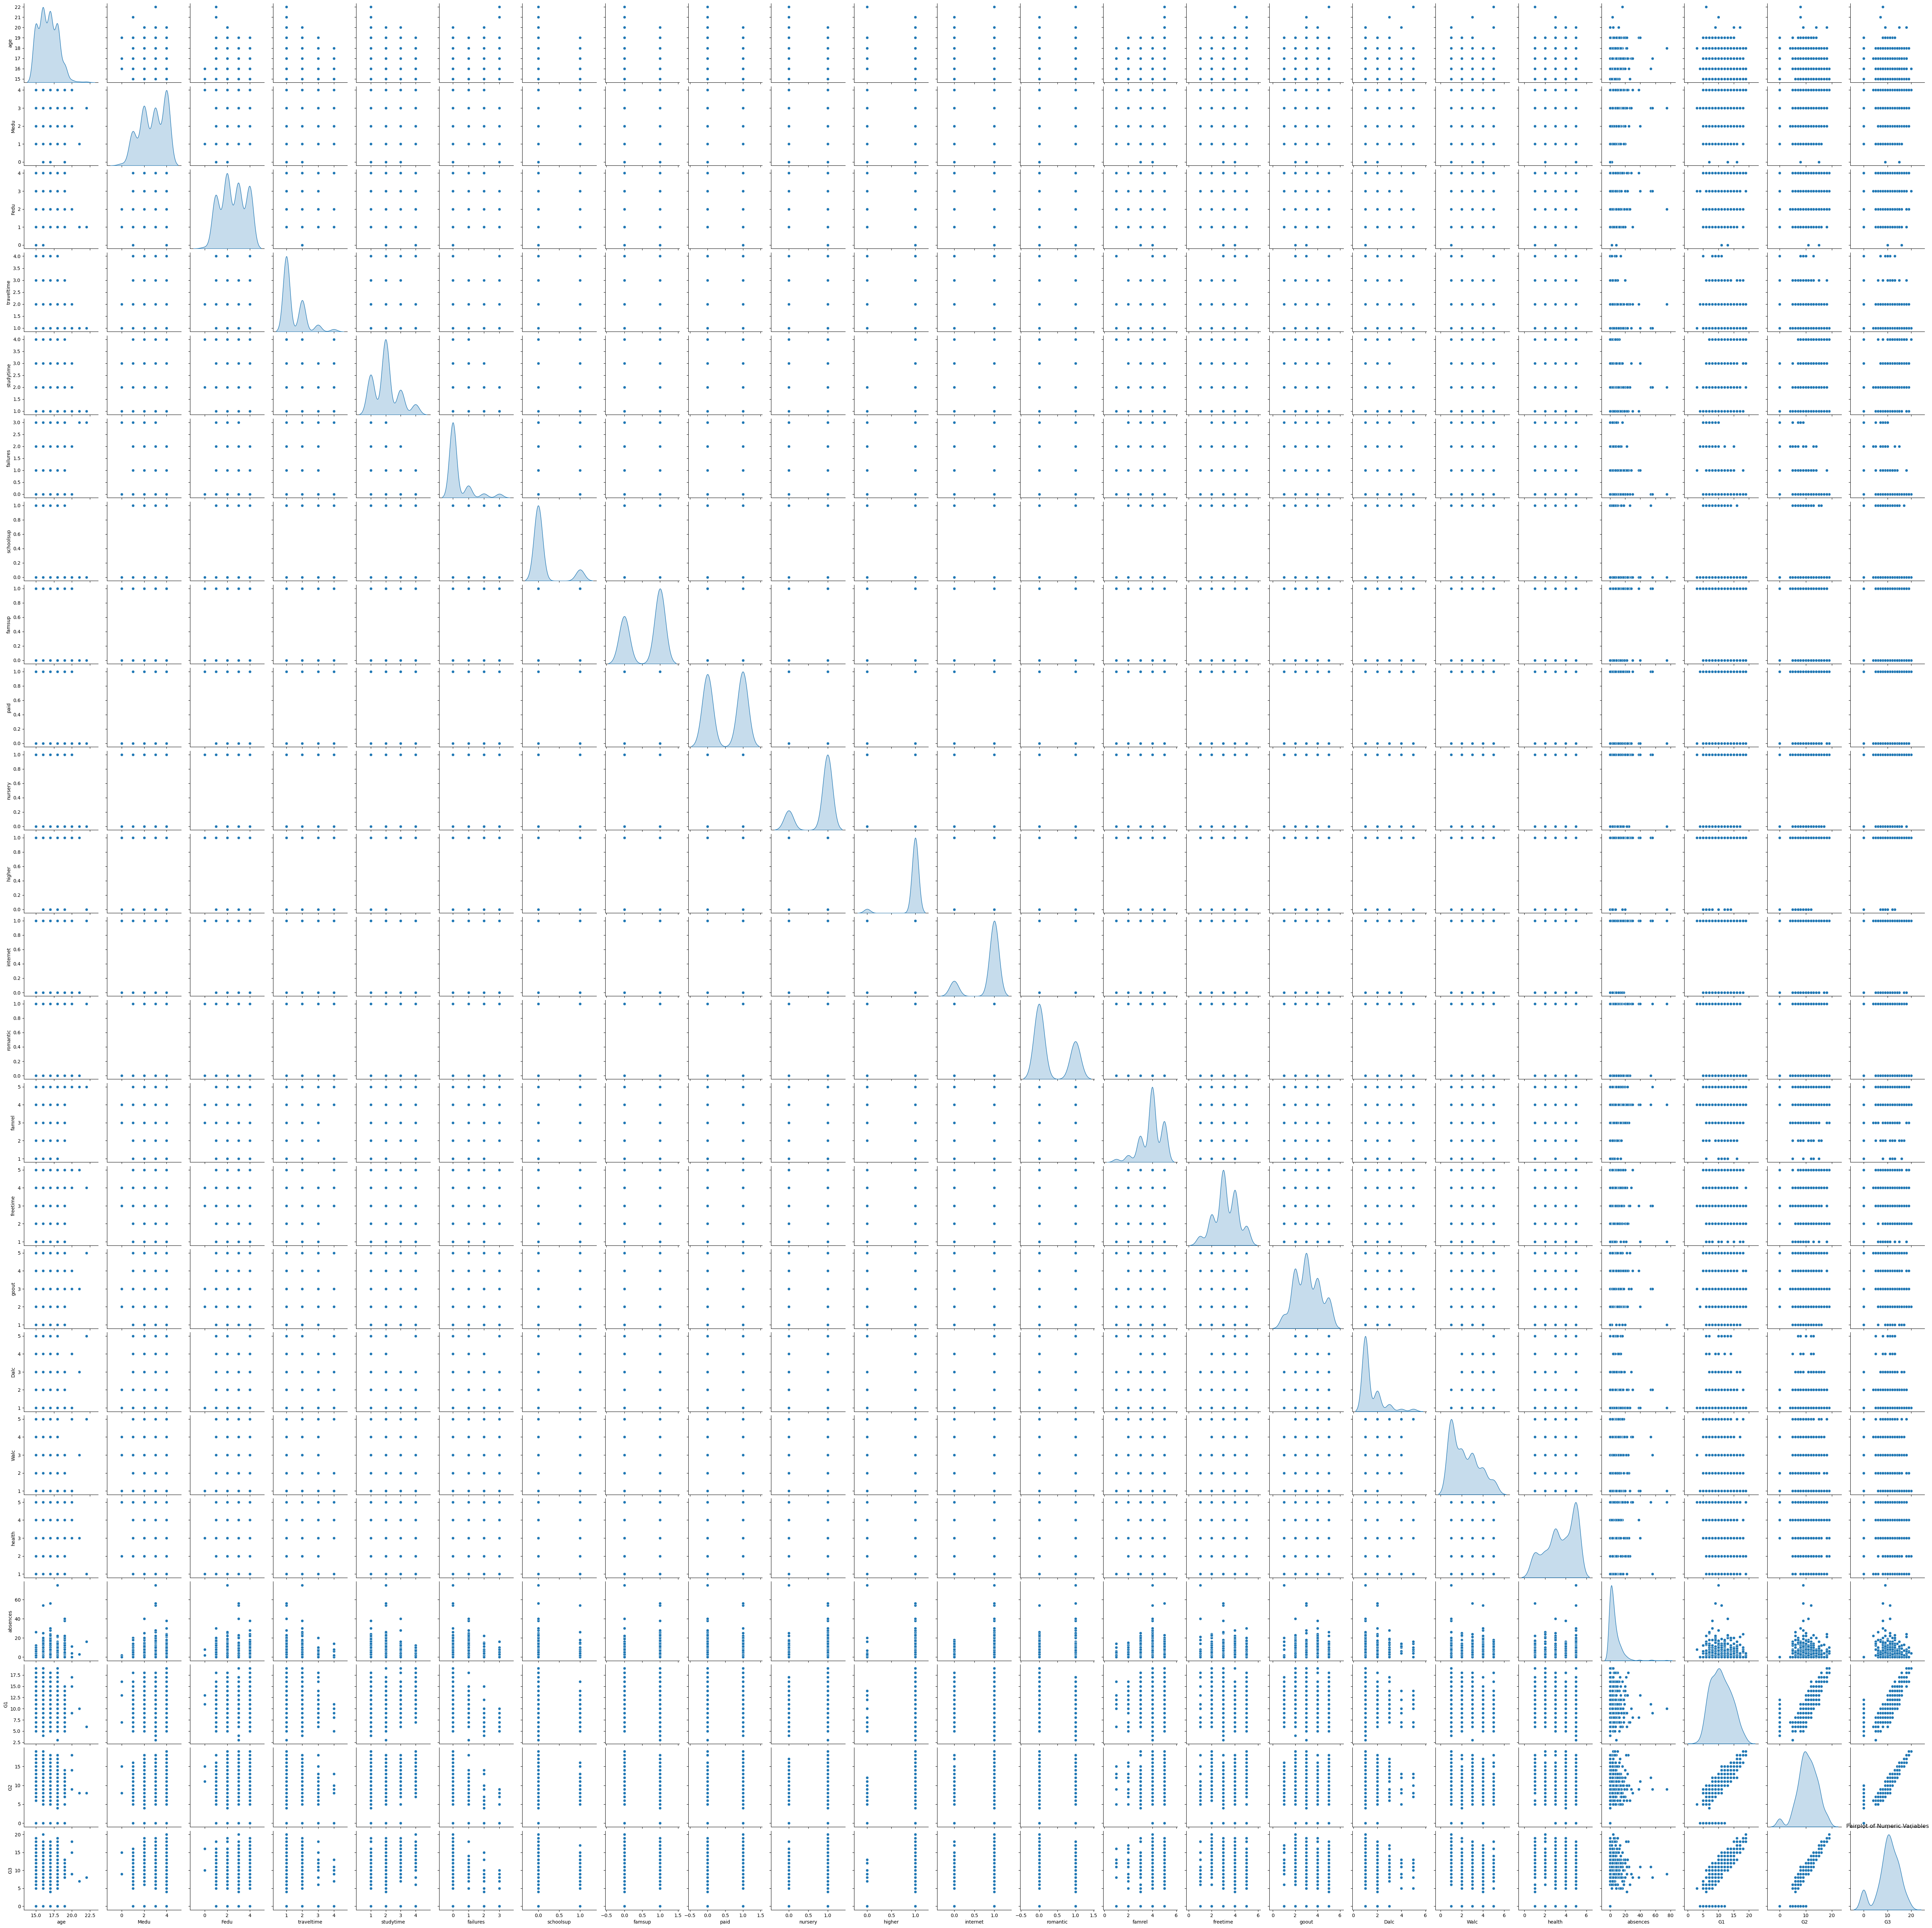

In [7]:
# Pairplot to visualize pairwise relationships for numeric variables
sns.pairplot(data[numeric_cols], diag_kind='kde')
plt.title('Pairplot of Numeric Variables')
plt.show()

------  
# Modeling 

In [69]:
# imports

from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
#from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression,LogisticRegression, Lasso, LassoCV

## Lasso 
used to predict G3 (continuous data)

In [49]:
x = data[numeric_cols]
x = x.drop(['G1','G2','G3'], axis=1)    # drop G1 and G2 because of the high correlation with G3
y = data['G3']

In [50]:
# split between train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)

# scale data
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test) 

In [51]:
# lasso
lassocv = LassoCV(alphas=None, cv=5, max_iter=10000)
lassocv.fit(x_train, y_train)
lasso = Lasso(max_iter = 10000)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
lasso.score(x_train,y_train)

0.21843149771031578

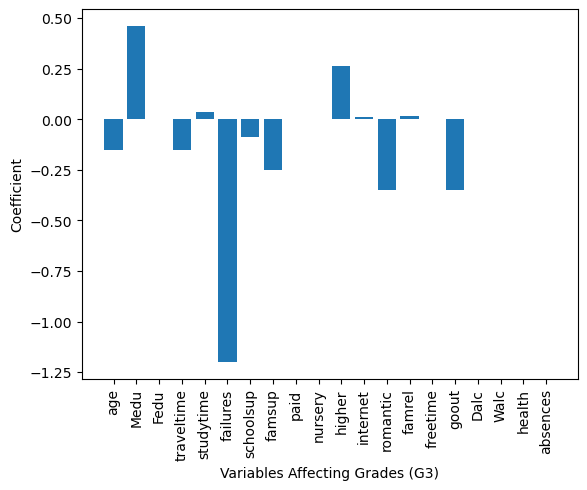

In [54]:
plt.figure()
plt.bar(x.columns,lasso.coef_)
plt.xticks(rotation= "vertical")
plt.xlabel('Variables Affecting Grades (G3)')
plt.ylabel('Coefficient')
plt.show()

### Compare to linear regression  
Linear Regression, same variables to test MSE

In [55]:
mse_lasso = mean_squared_error(y_test, y_pred)
print(mse_lasso)

19.48063753533719


In [56]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)

In [57]:
mse_linear = mean_squared_error(y_test,y_pred_linear)
print(mse_linear)

# personal test to see which is more accurate
# if the difference in accuracy was that big

20.845487331944526


## Logistical Regression 

logistic regression to predict family support because it's binary

In [58]:
x = data[numeric_cols]
x = x.drop('famsup',axis=1)
y = data['famsup']

In [59]:
# train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)

# scale data
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test) 

# select logistic regression model
logreg = LogisticRegression(random_state=16,max_iter = 5000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [60]:
# calculate accuracy
correct = (y_pred==y_test)
ncorrect = np.sum(correct)
percentcorrect = 100*ncorrect/len(y_test)
print(percentcorrect)

56.56565656565657


In [61]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[16 30]
 [13 40]]


([<matplotlib.axis.YTick at 0x267a49abb20>,
 [Text(0, 0.5, 'No Support'), Text(0, 1.5, 'Has Support')])

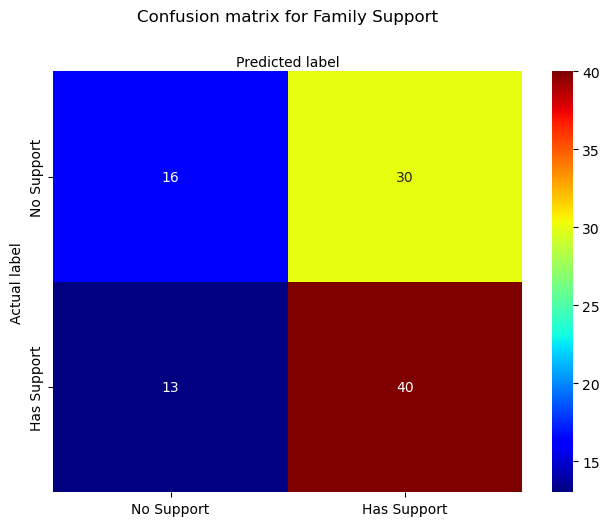

In [62]:
#Never say '"Healthy", "Normal", just say "Undiagnosed"
class_names=['No Support','Has Support'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Family Support', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)

In [63]:
print(classification_report(y_test,y_pred,target_names=class_names))

              precision    recall  f1-score   support

  No Support       0.55      0.35      0.43        46
 Has Support       0.57      0.75      0.65        53

    accuracy                           0.57        99
   macro avg       0.56      0.55      0.54        99
weighted avg       0.56      0.57      0.55        99



In [64]:
y_pprob = logreg.predict_proba(x_test)

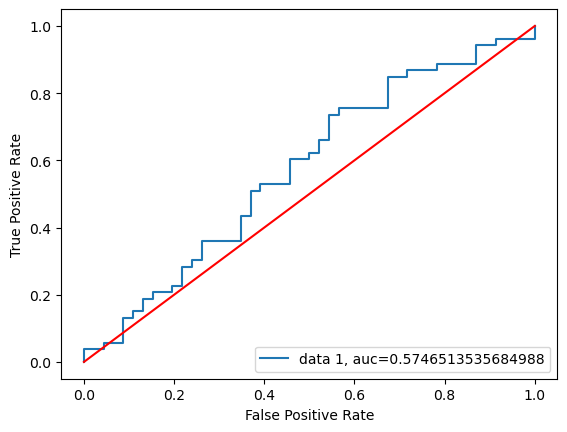

In [65]:
fpr, tpr, _ = roc_curve(y_test,  y_pprob[:,1])
auc = roc_auc_score(y_test, y_pprob[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],'r-')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## RandomForest  
for alcohol consumption

In [70]:
x = data[numeric_cols] 
x = x.drop(['G1','G2','Walc','Dalc'],axis=1)
y = data['Dalc'] 

# train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)

# scale data
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test) 

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=16)

# train and fit the model
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)


In [71]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print('Feature Importance:')
print(feature_importance_df)

Feature Importance:
       Feature  Importance
17    absences    0.113806
18          G3    0.102664
0          age    0.076757
1         Medu    0.071024
13      famrel    0.069288
16      health    0.066192
15       goout    0.064864
14    freetime    0.060979
2         Fedu    0.057099
4    studytime    0.051764
5     failures    0.050263
3   traveltime    0.047740
7       famsup    0.030976
8         paid    0.030863
12    romantic    0.029231
9      nursery    0.024163
11    internet    0.020798
10      higher    0.016598
6    schoolsup    0.014930


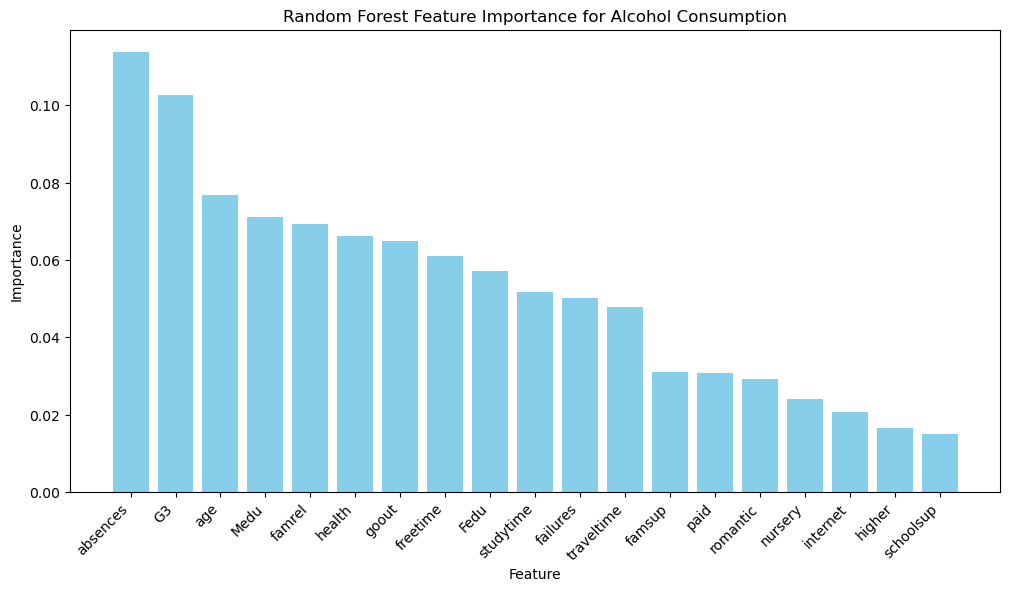

In [72]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance for Alcohol Consumption')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()